# Изучение российского рынка кинопроката.

## Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
Цель -  изучить рынок российского кинопроката.
Задачи: 
    1. выявить текущие тренды;
    2.выяснить особенности проката фильмов, получивших государственную поддержку;
    оценить интерес зрителя к фильмам, получившим государственную поддержку;
Описание данных.
Данные опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Данные представленны двумя таблицами: mkrf_movies (15 параметров для анализа) 877.4+ KB и mkrf_shows (2 параметра для анализа) 49.5 KB.

Структура исследования.

[Часть 1. Изучение данных.](#Step1)

[Часть 2. Предобработка данных.](#Step2)

Обработка столбцов с категориальными данными:
1. удаление ошибок
2. изменение типов данных
3. поиск пропусков
4. удаление дубликатов

Объединение таблиц.

Обработка столбцов с количественными данными.

[Часть 3. Исследовательский анализ данных.](#Step3)
Определение количества фильмов, вышедших в прокат в течение каждого года.
Нахождение доли фильмов с информацией о прокате в общем количестве фильмов
Исследование динамики проката по годам.
Определение среднего и медианного размера сборов за каждый год.
Определение степени влияния возрастного ограничения аудитории на сборы фильма в прокате в период с 2015 по 2019 год.

[Часть 4. Исследование фильмо, получивших государственную поддержку.](#Step4)
Выявление размера средств,  выделенных на поддержку кино.
Проверка окупаемости таких фильмов.
Выяснение их рейтинга.
Определение частоты получения господдержки режиссёрами за 10 лет.
Выяснение названий фильмов режиссёра, получавшего поддержку наибольшее количество раз.
Нахождение доли государственной поддержки в общем бюджете фильмов такого режиссёра.
Определение среднего рейтинга фильмов режиссёра - "чемпиона"
Получение информации об окупаемости фильмов этого режиссёра.
Определение жанра, чаще всего поддерживающнгося государством за весь исследуемый период.
Выявление количества студий, чьи проекты, поддержанные государством окупились и их отношение к общей массе студий, получивших господдержку.

[Часть 5. Общий вывод по исследованию.](#Step5)

# Изучение данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
server_path_movies = '/datasets/mkrf_movies.csv'   #сохраняем путь к файлу на сервере Практикума
local_path_movies = 'C:\datasets\mkrf_movies.csv'               #сохраняем путь к файлу на компьютере 
server_path_shows = '/datasets/mkrf_shows.csv'   #сохраняем путь к файлу на сервере Практикума
local_path_shows = 'C:\datasets\mkrf_shows.csv'               #сохраняем путь к файлу на компьютере 

try:
    data = pd.read_csv(server_path_movies)    #пробуем найти данные о фильмах по сетевому адресу
except: 
    data = pd.read_csv(local_path_movies)     #если не находим по сетевому, ищем по локальному
    
try:
    data_table = pd.read_csv(server_path_shows)    #пробуем найти данные о кассовых сборах по сетевому адресу
except: 
    data_table = pd.read_csv(local_path_shows)     #если не находим по сетевому, ищем по локальному
    
    
data.info()
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:

#data = pd.read_csv('/datasets/mkrf_movies.csv')
#data_table = pd.read_csv('/datasets/mkrf_shows.csv')
#data.info()
#data_table.info()

В таблице mkrf_movies данные только по пяти параметрам представленны полностью.
Часть цифровых данных имеет тип данных object. Данные о финансировании фильмов представленны предельно скудно (4.43% от общеего количества фильмов)
Данные таблицы mkrf_shows дают информацию о прокате только 42.19% фильмов, представленных в таблице mkrf_movies, что ограничивает возможности исследования.


## Предобработка данных.

### Обработка столбцов с категориальными данными.

In [4]:
#Ошибку в столбце puNumber заменяю на значение NaN и преобразую тип данных в этом столбце - с object на int64.
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce').fillna(0).astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
#Меняю тип данных в столбце show_start_date на datetime.
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y.%m.%dT%H:%M:%S')
display(data['show_start_date'].head())

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [6]:
#Объединяю таблицы.
movies_data = data.merge(data_table, on = 'puNumber', how = 'left')
movies_data.info() # проверяю объедение двух таблиц


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [7]:
#Ищу пропуски в столбцах.
movies_data.query('production_country != production_country')
movies_data.query('film_studio != film_studio')
movies_data.query('age_restriction != age_restriction')

movies_data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пропуски присутствуют в колонках с категориальными данными: film_studio, production_country, director, producer,  financing_source, ratings, genres, box_office. 
Заполнять пропуски в колонках с числовыми значениями нет возможности, поскольку нет данных для их заполнения, в то же время значения NaN технически не препятствуютнашим дальнейшим расчётам, хотя и делают их менее репрезентативными.
Два пропуска в столбце production_country и в целом в строке 4441 не препятствуют решению задачи, по этой причине, я оставляю таблицу как есть.
Восемнадцать пропусков в столбце film_studio уже более заметны, но тратить время на поиск студии в каждом случае, замены типа данных float на object для каждой ячейки нет необходимости, поскольку это не влияет на решение поставленной задачи.
То же относится к девяти пропускам в столбце director.
Большое количество пропусков в столбце producer в значительной мере представленно советскими фильмами, в период создания которых продюсер как действующее лицо не обозначался или обозначался как директор кинокартины, или такой фигуры вообще не было. В остальных случаях пустые ячейки пришлось бы заполнять вручную, заменяя при этом тип данных с float на object, что было бы совершенно излишне, исходя из поставленной задачи.
Нет необходимости заполнять пустые ячейки в столбце ratings (967 значений), работу пришлось бы проводить вручную, при том, что на решение задачи данный параметр не влияет.
То же можно сказать о столбце genres (976 пустых ячеек).
Столбцы, содержащие информацию, о финансировании фильмов, имеют одинаковое количество пропусков. Эти пропуски можно обозначить как случайные, по предложенной классификации. Но они связанны между собой. Возможно они являются частью какой-то другой таблицы, которая была включена в состав mkrf_movies.csv ранее.
Столбцы  ratings и  genres так же могли быть включены либо в составе одной таблицы либо из двух разных.
Сама таблица mkrf_movies.csv уже является результатом объединения трёх или более таблиц.
Пропуски в столбцах: refundable_support, nonrefundable_support, budget и financing_source неслучайны. Они свидетельствуют о том, что фильмы были сняты без государственной поддержки.

In [8]:
#Удаляю неявные дубликаты в столбце type.
display(movies_data['type'].unique())
movies_data['type'] = movies_data['type'].str.strip()
movies_data['type'] = movies_data['type'].str.strip()
movies_data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

В таблице довольно много дубликатов. В столбце title их число доходит до пяти. Это вызвано тем, что на один и тот же фильм получено больше одного прокатного удостоверения без исключительных прав.
Дубликаты в столбце type неизбежны ввиду ограгиченности самого числа типов фильмов.
Дубликаты в столбце film_studio могут присутствовать по двум причинам. Во-первых, - каждая студия сняла за время своего существования больше одного фильма. Во-вторых, часть студий (по крайней мере - российских) имеют схожие официальные название, и в таком случае в столбце появляется подобие скрытых дубликатов, тогда как в действительности это просто юридические ухищрения (ООО "Ералаш", функционирующее с 14.10.2003, и ООО "Продюссерский центр Ералаш", существующее с 18.01.2004.). Ещё одна причина появления дубликатов (неявных) - кооперация студий при создании фильмов. В результате студия в кооперации с другими будет упоминаться дополнительно столько раз, сколько фильмов было снято ею или с её участием.
Есть ещё по меньшей мере один странный пример. ООО "Мульт в кино" методом value_counts() выявляется дважды: на второй позиции, с 57 фильмами, и на четвёртой - 18 фильмами. Возможно, проблема кроется в лишнем пробеле после названия компании. Проверю это предположение и по возможности уберу дубликат в следующей ячейке.



In [9]:
#Убираю скрытое дублирование в названии кинокомпании.
movies_data['film_studio'] = movies_data['film_studio'].replace('ООО "Мульт в кино" ', 'ООО "Мульт в кино"')

movies_data['film_studio'] = movies_data['film_studio'].replace('АО "Аэроплан"', 'ЗАО "Аэроплан"')


def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        movies_data['film_studio'] = movies_data['film_studio'].replace(wrong_value, correct_value)

duplicates = ['Анимаккорд Лтд', 'ООО Студия "АНИМАККОРД" - АНИМАККОРД ЛТД.']
name = 'ООО Студия "АНИМАККОРД" - ANIMACCORD LTD.'
replace_wrong_values(duplicates, name)
 
movies_data['film_studio'].value_counts().head(60)
movies_data['film_studio'].isna().sum()

18

Убрал неявные дубликаты в названиях кинокомпаний ООО "Мульт в кино" и ООО Студия "АНИМАККОРД" - ANIMACCORD LTD.
Остальные дубликаты являются мнимыми (в столбцах type, film_studio, production_country, director, producer, age_restriction, financing_source, ratings, genres). Это неизбежно повторяющиеся типы фильмов, названия студий, стран производства, имена режисёров и продюссеров и названия продюссерских центров, категории возрастных ограничений, источники финансирования, значения рейтингов, названия жанров. Так же присутствуют различные сочетания имён режисёров и продюссеров, названий кинокомпаний и стран производства, в случаях совместного роизводства фильмов.
Проблемой является столбец ratings, сохранённый как object и содержащий в себе не только обычные значения рейтингов от 1 до 10 с десятыми долями, но и значения в процентах(%), а так же одно значение "nan". Кроме того, часть значений в столбце имеет тип object, часть - float. Приведу значение в этой колонке к единообразному виду.

In [10]:
#Привожу значения в колонке ratings к единоообразному виду.
movies_data['ratings'] = pd.to_numeric(movies_data['ratings'], errors = 'coerce')

movies_data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [11]:
display(movies_data.duplicated().sum())
display(movies_data['puNumber'].value_counts())
movies_data_duplicates = movies_data.query('puNumber == 221054410 or puNumber == 221154310')
display(movies_data_duplicates)

0

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Полных дубликатов в таблице нет.
В столбце puNumber два номера прокатных удостоверений дублируются. 221054410 может быть ошибкой при наборе, поскольку род этим номером обозначены прокатные удостоверения на два фильма, из которых один является продолжением другого.
Та же ситуация с номером 221154310 необъяснима. Этот номер прокатного удостоверения написан для двух разных фильмов.
Поскольку в данном случае я не работаю с прокатными удостоверениями, можно оставить ситуацию как есть.

### Обработка столбцов с количественными данными.

In [12]:
#Изучаю столбцы, которые хранят количественные значения.
#display(movies_data['refundable_support'].value_counts())
#display(movies_data['refundable_support'].describe())
# movies_data['nonrefundable_support'].value_counts().head(60)
# movies_data['nonrefundable_support'].describe()
display(movies_data['budget'].value_counts())
display(movies_data['budget'].describe())
# movies_data['box_office'].value_counts().tail(60)
# movies_data['box_office'].describe()
budget_size = movies_data[movies_data['budget'] < (movies_data['refundable_support'] + movies_data['nonrefundable_support'])]

for index in range(0, len(movies_data['budget'])):
    refundable_support = movies_data['refundable_support'][index]
    budget = movies_data['budget'][index]
    nonrefundable_support = movies_data['nonrefundable_support'][index]
    if budget < (refundable_support + nonrefundable_support):
        movies_data.loc[index, 'budget'] = refundable_support + nonrefundable_support

display(movies_data.query('budget == (refundable_support + nonrefundable_support)'))



0.0            17
38000000.0      6
50000000.0      4
80000000.0      4
37142857.0      3
               ..
109020947.0     1
90276774.0      1
78686500.0      1
14462464.0      1
150147502.0     1
Name: budget, Length: 290, dtype: int64

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,59000000.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,Фонд кино,5.6,фантастика,1.038321e+09


Пропуски в большом количестве присутствуют в колонках: refundable_support, nonrefundable_support, budget.
Из 332 фильмов, для которых есть данные о возвратных средствах поддержки из государственного бюджета, 221 фильм её не получил. О фильмах, не отразившихся в этой колонке у нас информации по данному вопросу нет (в ячейках стоит NaN). Интересно, что медианное значение такой поддержки равно нулю.
Из 332 фильмов, для которых есть данные о возвратных средствах поддержки из государственного бюджета, только 9 фильмов её не получили. Об остальных фильмах информации по получении невозвратных средств господдержки нет, и в ячейках стоит значение NaN. Медианное значение такой поддержки - 30000000. Вероятнее всего суммы выделялись в рублях.
Данные колонки budget озадачивают. 17 фильмов имели нулевой бюджет. Учитывая, что отсутствие данных в этом случае отражается значением NaN, ноль либо является ошибкой либо означает, что фильмы снимались за счёт членов съёмочной группы.
Столбец box_office даёт неожиданную информацию с нулевыми (24 значения) или близкими к нулю сборами. Нулевые или близкие к нулю сборы могут означать провалившиеся в прокате, малоизвестные фильмы. Относительно небольшие суммы могут быть собраны провинциальными кинотеатрами или онлайн-кинотеатрами.

17 фильмов в таблице имеют бюджет меньше совокупного государственного финансирования. В таких случая я приравниваю бюджет к совокупному государственному финасированию фильма. Этот ход не даст надёжных данных, но сделает общую картину более приближенной к реальности. При помощи метода query() ппроверил результат.

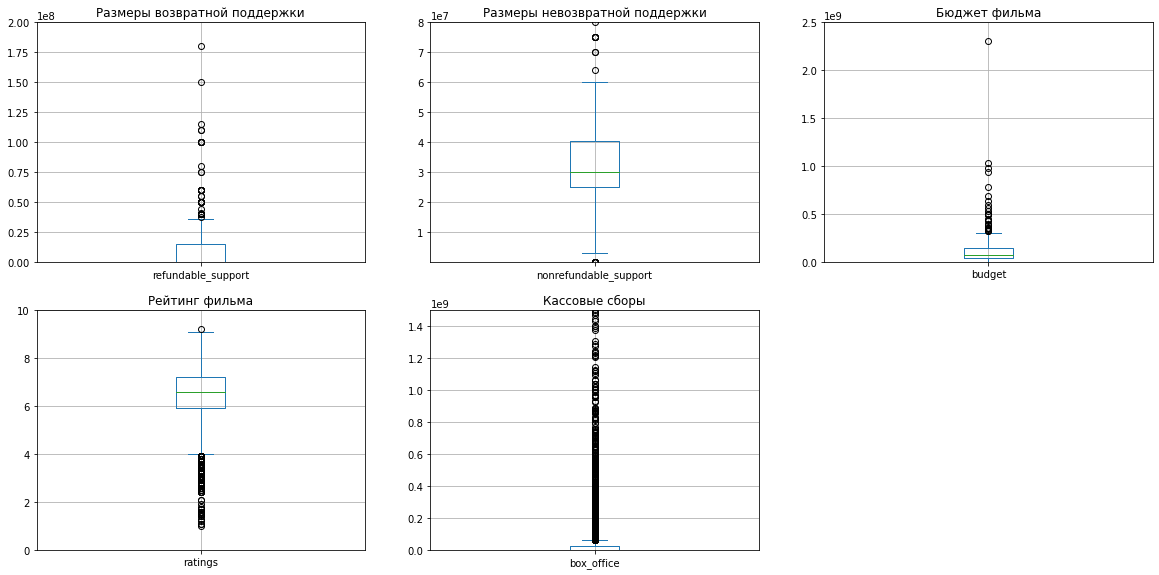

In [13]:
#Выявляю нормальные значения в данных, касающихся финансирования фильмов.

column_list_box = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']
title_list_box = ['Размеры возвратной поддержки', 'Размеры невозвратной поддержки', 'Бюджет фильма', 'Рейтинг фильма', 'Кассовые сборы']
limits_list = [[0, 200000000], [10000, 80000000], [0, 2500000000], [0,10], [0, 1500000000]]

ax = movies_data[column_list_box].plot(kind='box', subplots=True, layout=(3,3), figsize=(20,15), grid=True)

for i in range(len(column_list_box)):
    ax[column_list_box[i]].set_ylim(limits_list[i])
    ax[column_list_box[i]].title.set_text(title_list_box[i])
    

Все размеры возвратных средств свыше 375 млн. рублей оказываются выбросом. Ситуация тем более необычная, что медианное значение по этому параметру равно нулю, тогда как среднее - 11864460. Странность вызвана тем, что практически две трети фильмов о которых есть данные о финансовой поддержке возвратными средствами, такой поддержки не получили. Поскольку данных чрезвычайно мало, убирать выброс нет смысла, иначе эти данные потеряют даже намёк на репрезентативность.
Помощь невозвратными средствами в большинстве случаев составляет 200 тыс. до 6 млн. рублей. Всё, что больше - в теории составляет выброс. По причине немногочисленности данных я буду использовать все значения.
Бюджет основной массы фильмов не превышает 250 млн. рублей. Однако, учитывая общий дефицит информации по этому вопросу, можно взять в рассчёт фильмы с бюджетом до 1 млрд. рублей
Значения рейтинги большинства фильмов находятся в диапазоне от 4 до 9. При это рейтинги 50% фильмов находятся в диапазоне 5.9 - 7.1
Кассовые сборы свыше 50 млн. рублей составляют выброс.
Проверю долю выброса от общего числа значений в колонке box_office.

In [14]:
box_office_anomaly = movies_data[movies_data['box_office'] > 50000000].count()
display(box_office_anomaly)
box_office_anomaly_share = box_office_anomaly / movies_data['box_office'].count()
box_office_anomaly_share

title                    597
puNumber                 597
show_start_date          597
type                     597
film_studio              597
production_country       597
director                 597
producer                 596
age_restriction          597
refundable_support       121
nonrefundable_support    121
budget                   121
financing_source         121
ratings                  579
genres                   580
box_office               597
dtype: int64

title                    0.189044
puNumber                 0.189044
show_start_date          0.189044
type                     0.189044
film_studio              0.189044
production_country       0.189044
director                 0.189044
producer                 0.188727
age_restriction          0.189044
refundable_support       0.038315
nonrefundable_support    0.038315
budget                   0.038315
financing_source         0.038315
ratings                  0.183344
genres                   0.183661
box_office               0.189044
dtype: float64

Общая доля выброса в колонке box_office составляет 18.9%. Это слишком много для того, чтобы игнорировать такие данные. В дальнейшем я буду проводить анализ не убирая выброс.

### Добавление колонок в таблицу.

In [15]:
#Создаю колонку year, содержащую год проката.
movies_data['year'] = movies_data['show_start_date'].dt.year

In [16]:
#Создаю колонку year, содержащую имя и фамилию глвного режисёра.
movies_data['chief_director'] = movies_data['director'].str.split(',', 1, expand=True)[0]
#display(movies_data.head())

In [17]:
#Создаю колонку year, содержащую основной жанр.
movies_data['main_genre'] = movies_data['genres'].str.split(',', 1, expand=True)[0]
#display(movies_data.head())

In [18]:
#Нахожу долю государственной поддержки в бюджете каждого фильма.
movies_data['state_support_share'] = (movies_data['refundable_support'] + movies_data['nonrefundable_support'])	 / movies_data['budget']
#display(movies_data['state_support_share'].tail(60))
# movies_data['state_support_share'].value_counts().tail(60)
movies_data['state_support_share'].unique()
#display(movies_data['state_support_share'].median())

array([       nan, 0.33370314, 0.7       , 0.61269064, 0.69009473,
       0.62476381, 0.48216008, 0.67999951, 0.53940683, 0.53743599,
       0.69999998, 0.7       , 0.68947448, 0.35272785, 0.27723917,
       0.37378187, 1.        , 0.50121231, 0.12963849, 0.62962963,
       0.65702441, 0.66656877, 0.21      , 0.12      , 0.40975944,
       0.25      , 0.66896323, 0.67994543, 0.69767442, 0.38758813,
       0.52737763, 0.22192632, 0.33671433, 0.68992812, 0.69286755,
       0.42581383, 0.36235166, 0.62036062, 0.65331017, 0.69910397,
       0.17783734, 0.69840404, 0.36146563, 0.66268254, 0.67516879,
       0.66392217, 0.69999999, 0.43054823, 0.70000001, 0.68297529,
       0.69      , 0.32432432, 0.6024407 , 0.63778177, 0.6224779 ,
       0.62459948, 0.29917895, 0.695     , 0.69999999, 0.64974102,
       0.55555556, 0.36759115, 0.68717703, 0.62287229, 0.69444444,
       0.48231756, 0.69996216, 0.67122405, 0.36097849, 0.34069436,
       0.66666667, 0.62591548, 0.5931632 , 0.37313433, 0.59226

В массе своей значение доли государственной поддержки в бюджете российских фильмов составляет до 0.66, медианное значение - 0.61. Таким образом, обычный российский фильм более чем на половину финансируется государством. Это обстоятельство с одной стороны свмидетельствует о неразвитости российского коммерческого кино, с другой - указывает на то, что в фильмах так или иначе реализуется госзаказ.
Значения inf, как среднее и максимальное значения доли государственного финансирования, и NaN, как значение стандартного отклонения пока оставляют меня в изумлении.

## Исследовательский анализ данных.

In [19]:
#Определяю долю фильмов с информацией о прокате в общем количестве фильмов.
#Нахожу количество фильмов за каждый год и фильмов с информацией о прокате по годам.
movies_data_pivot = movies_data.pivot_table(index = 'year', values = ['title', 'box_office'], aggfunc = 'count')
display(movies_data_pivot)

#Нахожу общее количество фильмов.
movies_total_number = movies_data_pivot['title'].sum()
#Получаю количество всех фильмов с информацией о прокате за 10 лет.
release_information_total = movies_data_pivot['box_office'].sum()
display(release_information_total)

#Нахожу долю фильмов с данными о прокате от общего их количества.
release_information_share = release_information_total / movies_total_number
display(release_information_share)



,box_office,title
year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,807
2015,465,705
2016,526,818
2017,357,505
2018,475,891


3158

0.42185412770504943

year
2010    0.106599
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.345725
2015    0.659574
2016    0.643032
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64

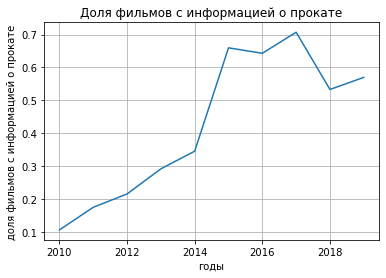

In [20]:
#Нахожу долю фильмов с информацией о прокате по годам.
release_information_per_year = pd.to_numeric(movies_data_pivot['box_office'], errors = 'coerce') / pd.to_numeric(movies_data_pivot['title'], errors = 'coerce')

#Построю график для наглядности.
#Создам функцию, которая позволит выводить одновременно числовые значения и график.
def display_data(data_table, figsize, xlabel, ylabel, title):
    display(data_table)
    ax = data_table.plot(grid=True, title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

display_data(
    release_information_per_year,
    figsize = (10,10),
    xlabel = 'годы',
    ylabel='доля фильмов с информацией о прокате',
    title = 'Доля фильмов с информацией о прокате'
)
plt.show()



Количество фильмов по годам найдено и представленно в сводной таблице movies_data_pivot. Доля фильмов с прокатной информацией составила 42,2% от их общей массы. Для указанного периода доля фильмов с указанной прокатной информацией имеет тенденцию к росту, хотя на 2018 год приходится провал, сменившийся некоторым ростом. Полнее всего в данных представлен период 2015-2017 гг. - за этот период доля фильмов, с указанной прокатной информацией составляет от 0.643 до 0.706.

,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


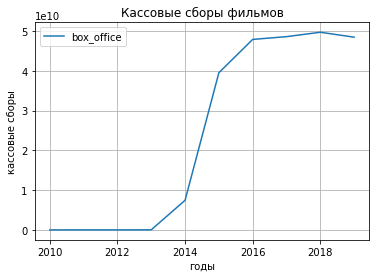

In [21]:
#Исследую динамику проката по годам.
film_distribution_per_year = movies_data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')

display_data(
    film_distribution_per_year,
    figsize = (10,10),
    xlabel = 'годы',
    ylabel='кассовые сборы',
    title = 'Кассовые сборы фильмов'
)
plt.show()

Минимальная сумма сборов была в 2011 г. С 2013 г. по 2016 г.в, сборы практически взрывообразно. До 2018 г. был характерен незначительный дальнейший рост, после чего последовало небольшое снижение до уровня 2017 г. Для более корректного сравнения максимумов и минимума а так же - динамики в целом, необходимо учитывать инфляцию, тем более, что сумма сборов указана в рублях.

,mean,median
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,3.069095e+06,16210.000
2015,1.300236e+07,2583688.500
2016,1.132928e+07,2046934.500
2017,1.419013e+07,5510864.500
2018,1.487507e+07,5150012.255


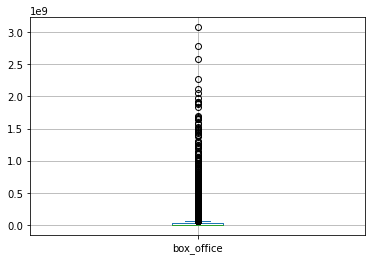

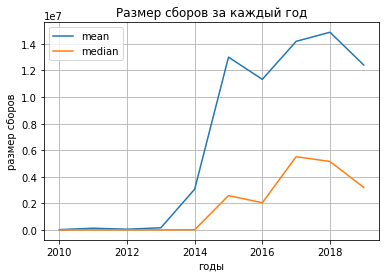

In [22]:
#Нахожу среднее и медианное значение сборов за каждый год.
#Нахожу значения без учёта выброса.
film_distribution_per_year = movies_data.groupby('year')['box_office'].agg(['mean', 'median'])
#dispiay(film_distribition_per_year)

#Определяю, какие значения в колонке box_office составляют выброс.
# movies_data.boxplot('box_office', figsize=(20,15), grid=True)
ax = movies_data['box_office'].plot(kind='box', grid=True)
plt.ylim = 3000000000

#Создаю колонку box_office2, куда входят только значения без выброса - не более 100 млн. рублей 
movies_data['box_office2'] = movies_data.loc[movies_data['box_office'] <= 100000000]['box_office']
film_distribution_per_year2 = movies_data.groupby('year')['box_office2'].agg(['mean', 'median'])


#display(film_distribution_per_year2)

display_data(
    film_distribution_per_year2,
    figsize = (10,10),
    xlabel = 'годы',
    ylabel='размер сборов',
    title = 'Размер сборов за каждый год'
)
plt.show()

In [23]:
#Считаю количество фильмов, попавших в выброс по значению кассовых сборов.
movies_data_anomaly = movies_data[movies_data['box_office'] > 100000000].count()
display(movies_data_anomaly)

title                    435
puNumber                 435
show_start_date          435
type                     435
film_studio              435
production_country       435
director                 435
producer                 434
age_restriction          435
refundable_support        85
nonrefundable_support     85
budget                    85
financing_source          85
ratings                  421
genres                   422
box_office               435
year                     435
chief_director           435
main_genre               422
state_support_share       85
box_office2                0
dtype: int64

Поскольку бОльшая часть значений колонки box_office составляет выброс, разница между средним и медианным значением кассовых сборов составляет десятки раз. При подсчёте с учётом выброса средний показатель за каждый год меняется сильнее, чем медианный.
Выполнил оба варианта досчёта, поскольку слишком большое количество значений столбца оказываются выбросом.
В выброс попадает 435 фильмов из 3158, кассовые сборы которых нам известны. Они составляют 13.7% от общей массы. Это слишком много. Соответственно остальные рассчёты будут проводиться без удаления аномалий.

year
2010    0.106599
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.345725
2015    0.659574
2016    0.643032
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64

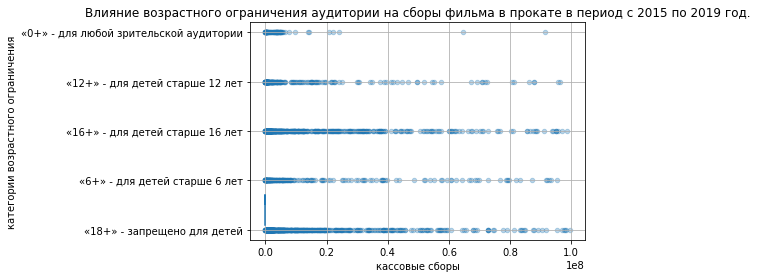

In [24]:
#Определяю степень влияния возрастного ограничения аудитории на сборы фильма в прокате в период с 2015 по 2019 год.
movies_data_year = movies_data.loc[movies_data['year'] >= 2015]
movies_data_year.plot(x='box_office2', y='age_restriction', kind='scatter', alpha=0.3)

#display(movies_data_year)

display_data(
    release_information_per_year,
    figsize = (10,10),
    xlabel = 'кассовые сборы',
    ylabel='категории возрастного ограничения',
    title = 'Влияние возрастного ограничения аудитории на сборы фильма в прокате в период с 2015 по 2019 год.'
)
plt.show()

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


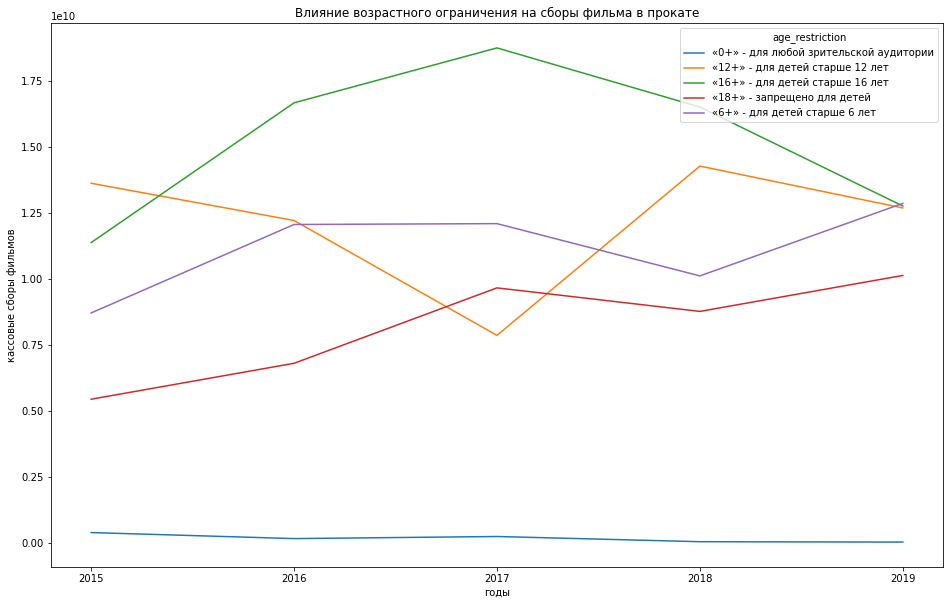

In [25]:
#Выясняю влияние возрастного ограничения на сборы фильма в прокате.
movies_data_restriction = movies_data_year.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office', aggfunc = 'sum')
display(movies_data_restriction)
movies_data_restriction.plot(title = 'Влияние возрастного ограничения на сборы фильма в прокате', xlabel = 'годы', ylabel='кассовые сборы фильмов', figsize = (16, 10))
plt.xticks(range(2015, 2020, 1))
plt.show()

За период 2015-2019 гг. больший доход приносили фильмы категорий 16+. По итогам четырёх лет из пяти (2015-2018 гг.) фильмы данной категории ограничения лидировали и лишь немного уступили в 2019 г. категории ограничения 6+. Возможно, такая ситуация была вызвана увеличением производства полнометражных мультфильмов, на которые можно ходить всей семьёй.

### Исследование фильмов, получивших государственную поддержку.

In [26]:
#Определяю количество российских фильмов, представленных в таблицах.
russian_movies = movies_data[movies_data['production_country'] == 'Россия']
display(russian_movies.head())
unique_russian_movies = russian_movies['title'].drop_duplicates().reset_index()
display(unique_russian_movies.head())


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,chief_director,main_genre,state_support_share,box_office2
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.1,"драма,комедия,приключения",360.0,2014,И.Зайцев,драма,NaN,360.0
462,Август. Восьмого,111000612,2012-02-07 12:00:00+00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,6.1,"драма,военный",6775.0,2012,Д.Файзиев,драма,NaN,6775.0
463,Тот еще...!,111001612,2012-02-20 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,2.6,"фэнтези,комедия,семейный",12779.0,2012,С.Андреасян,фэнтези,NaN,12779.0
464,КОКОКО,111003112,2012-06-05 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,...,NaN,NaN,6.9,"драма,комедия",200.0,2012,А.Смирнова,драма,NaN,200.0
469,Разговор,111000712,2012-02-07 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,...,NaN,NaN,7.6,"триллер,драма,детектив",NaN,2012,В.Иванов,триллер,NaN,NaN


,index,title
0,336,Каникулы строгого режима
1,462,Август. Восьмого
2,463,Тот еще...!
3,464,КОКОКО
4,469,Разговор


Всего в таблице представленно 1803 уникальных названия российских фильмов. Найти это число было необходимо, поскольку государственное финансирование получили именно российские фильмы. Иностранные его не получали. Советские фильмы не финансировались современным российским государством по понятным причинам.
Всего 332 фильма имеют информацию о государственном финансировании. Следовательно, мы имеем такие данные только относительно 18.41% всех представленных в таблице российских фильмов. Анализ информации относительно профинансированных фильмов будет проведён, но мы должны помнить о спорной репрезентативности полученных данных.

In [27]:
#Создаю таблицу с фильмами, получившими государственную поддержку.
gov_support_movies = movies_data.query('refundable_support >= 0 or nonrefundable_support >= 0')
display(gov_support_movies)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,chief_director,main_genre,state_support_share,box_office2
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703,365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691,19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764,232100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204,NaN
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316,NaN
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998,NaN


1281     26500000.0
1448     26000000.0
1498    107847945.0
1524     28000000.0
1792     25000000.0
           ...     
7464    500000000.0
7466    100000000.0
7474    500000000.0
7476     30000000.0
7478    100000000.0
Name: gov_support_total, Length: 332, dtype: float64

20200688312.0

year
2013    1.343479e+08
2014    5.720023e+08
2015    3.656241e+09
2016    4.303155e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: gov_support_total, dtype: float64

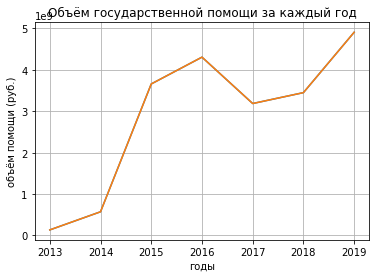

In [28]:
#Выясняю, сколько денег было выделено на поддержку кино в 2010-2019 гг. В том числе, за каждый год.
#Создаю колонку, в которой содержится сумма всей финансовой помощи для каждого фильма.
gov_support_movies['gov_support_total'] = (gov_support_movies['refundable_support'] + gov_support_movies['nonrefundable_support'])
display(gov_support_movies['gov_support_total'])
#Выясняю объём помощи за 10 лет.
display(gov_support_movies['gov_support_total'].sum())

#Считаю объём помощи за каждый год.
gov_support_movies_per_year = gov_support_movies.groupby('year')['gov_support_total'].sum()

gov_support_movies_per_year.plot()
display_data(gov_support_movies_per_year,
             
             title = 'Объём государственной помощи за каждый год',
             xlabel = 'годы',
             ylabel = 'объём помощи (руб.)',
             figsize = (10,10))

За 10 лет на господдержку кино было потрачено более 20 млрд. 200 млн. рублей. Заметный рост этой поддержки начался в 2013 г. С 2014 г. до 2015 г. наблюдался резкий рост вложений (более чем в 4 раза). В целом это может быть связано с поддержания уровня социального оптимизма в связи с международным кризисом 2014 г., последовашим за тем ростом международной напряжённости, а так же волны санкций и антисанкций. К 2017 г. напряжённость несколько снизилась, что и  привело, возможно, к некоторому уменьшению финансирования. Причины повторного роста финансирования по-видимому кроются в усилении государственного контроля за контентом в Сети, на ТВ и в кино.

In [29]:
#Нахожу медианное значение окупаемости всех фильмов за 10 лет без удаления выброса.
project_payback = (gov_support_movies['box_office'] /gov_support_movies['budget']).median()
display(project_payback)
#Нахожу медианное значение окупаемости всех фильмов за 10 лет после удаления выброса.
project_payback2 = (gov_support_movies['box_office2'] /gov_support_movies['budget']).median()
display(project_payback2)

round((1 - gov_support_movies['box_office2'].count() / gov_support_movies['box_office'].count()) * 100, 2)

0.17642032815058772

0.0579558876433068

26.73

Выброс слишком большой. Учитываем медианное значение без удаления выброса. Медианное значение окупаемости значительно меньше половины вложенных средств. Фильмы с государственным финансированием как правило не окупаются. 

In [30]:
#Нахожу медианный рейтинг фильмов, получивших господдержку
display(gov_support_movies['ratings'].median())
#Создаю таблицу с российскими фильмами, не получавшими никакогог финансирования от государства.
unsupport_movies = russian_movies[russian_movies['refundable_support'].isna()]
#display(unsupport_movies)
display(unsupport_movies['ratings'].median())

6.2

6.4

Медианный рейтинг таких фильмов не очень велик. Хотя при рейтинге 6.2 можно было бы, как представляется, ожидать лучшей окупаемости, чем она есть в действительности. Характерно, что рейтинг фильмов, НЕ получивших господдержки, несколько выше, - 6.4, то есть, на 3.23% выше. Государственные институты не очень точно попадают в плане зрительских предпочтений.

In [31]:
#Выясняю, сколько раз за изучаемый период режиссёр мог получить государственные средства.
director_gov_support = gov_support_movies.pivot_table(index = 'chief_director', values = 'gov_support_total', aggfunc = 'count')
display(director_gov_support.head())
director_gov_support.value_counts()


,gov_support_total
chief_director,
Ф.Бондарчук,1
А Андрющенко,1
А.Аббасов,1
А.Аксененко,3
А.Амиров,1


gov_support_total
1                    224
2                     37
3                      7
4                      2
5                      1
dtype: int64

Только 10 режиссёров из 270-ти за 10 лет получили государственную поддержку больше двух раз.

In [32]:
#Выясняю, кто из режиссёров пользовался господдержкой больше одного раза.
#Поскольку индексация в сводной таблице director_gov_support была проведена но колонке chief_director,
#Применяю к этой таблице метод reset_index(), чтобы имена режисёров составляли простую колонку.
director_gov_support = gov_support_movies.pivot_table(index = 'chief_director', values = 'gov_support_total', aggfunc = 'count').reset_index()
director_gov_support_count = director_gov_support[director_gov_support['gov_support_total'] > 1]
display(director_gov_support_count.sort_values(by = 'gov_support_total'))

,chief_director,gov_support_total
106,Д.Тюрин,2
238,Т.Бекмамбетов,2
134,И.Северов,2
135,И.Твердовский,2
148,К.Дружинин,2
160,К.Худяков,2
162,Л.Марголин,2
167,М.Волков,2
102,Д.Месхиев,2
177,М.Расходников,2


In [33]:
#Выясняю, какие фильмы получили финансирование у режиссёра-"чемпиона".
movies_by_directors = gov_support_movies.loc[gov_support_movies['chief_director'] == 'Р.Давлетьяров']['title']
display(movies_by_directors)
#Определяю средний рейтинг фильмов режиссёра-"чемпиона"
mean_ratings = gov_support_movies.loc[gov_support_movies['chief_director'] == 'Р.Давлетьяров']['ratings'].mean()
display(mean_ratings)

1498                 Невидимки
1870    А зори здесь тихие..._
2482                 Однажды._
2723         Чистое искусство.
6922          Донбасс. Окраина
Name: title, dtype: object

6.779999999999999

Средний рейтинг фильмов Давлетьярова, получавшего поддержку за счёт государственных средств чаще остальных оказался на 9.3% успешнее с точки зрения зрителей.

In [34]:
#Выясняю долю государственной поддержки в общем бюджете фильмов Давлетьярова.
#Нахожу общий бюджет всех фильмов.
movies_by_directors_budget = gov_support_movies.loc[gov_support_movies['chief_director'] == 'Р.Давлетьяров']['budget'].sum()

#Нахожу сумму государственной поддержки.
support_movies_by_directors = gov_support_movies.loc[gov_support_movies['chief_director'] == 'Р.Давлетьяров']['gov_support_total'].sum()

#Определяю долю государственной поддержки в бюджете фильмов Давлетьярова за исследуемый период.
support_share = support_movies_by_directors / movies_by_directors_budget
display(support_share)

0.596871621745552

Доля государственной поддержки в бюджетах фильмов Давлетьярова  составила почти 59.7% , что на 3% меньше, чем медианное значение для всех фильмов, получивших такую поддержку.

In [35]:
#Выясню, насколько окупаются фильмы самого поддержанного государством режиссёра.
champion_director = gov_support_movies.loc[gov_support_movies['chief_director'] == 'Р.Давлетьяров']
display(champion_director)

movies_payback = champion_director['box_office'] / champion_director['budget']
display(movies_payback)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,chief_director,main_genre,state_support_share,box_office2,gov_support_total
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691,19957031.50,107847945.0
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,...,Фонд кино,8.5,"драма,военный,история",2.491668e+08,2015,Р.Давлетьяров,драма,0.680000,NaN,150000000.0
2482,Однажды._,111004215,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,7.9,"драма,криминал,детектив",1.274840e+07,2015,Р.Давлетьяров,драма,0.620361,12748398.30,97000000.0
2723,Чистое искусство.,111008715,2015-05-05 12:00:00+00:00,Художественный,"ООО ""КОМПАНИЯ ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Р.Давлетьяров,«16+» - для детей старше 16 лет,15000000.0,...,Фонд кино,5.9,"триллер,детектив",6.457303e+06,2015,Р.Давлетьяров,триллер,0.671224,6457303.02,75000000.0
6922,Донбасс. Окраина,111007919,2019-06-12 12:00:00+00:00,Художественный,"АНО ""Интерфест"", ООО ""Пропеллер Продакшн""",Россия,Р.Давлетьяров,"Р.Давлетьяров, Г.Поземельный",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.3,"драма,военный,триллер",1.093343e+07,2019,Р.Давлетьяров,драма,0.283764,10933431.92,30000000.0


1498    0.113377
1870    1.129555
2482    0.081532
2723    0.057791
6922    0.103417
dtype: float64

Из всех фильмов Р.Давлетьярова, получивших поддержку государства, окупился только ремейк фильма "А зори здесь тихие...", не исключено, что и этим успехом режиссёр во многом обязан во-первых, качеству работы предшественника, и во-вторых, интересу зрителей к тематике Великой Отечественной войны. Три фильма из пяти, включая патриотический "Донбасс. Окраина", в прокате провалились, можно сказать с треском. В свою очередь, тот факт, что практически все фильмы чемпиона по количеству раз получения господдержки провалились, говорит о нерациональности принимаемых решений в этом вопросе. (Фонд кино в 2013-2015 гг. поддержал четыре фильма Давлетьярова, из которых три - провалились в прокате.)

In [36]:
#Выясняю, какой жанр чаще всего поддерживается государством.
genre_support = gov_support_movies.pivot_table(index = 'main_genre', values = 'gov_support_total', aggfunc = 'count').reset_index()
display(genre_support)

,main_genre,gov_support_total
0,биография,3
1,боевик,6
2,военный,9
3,детектив,5
4,детский,4
5,драма,93
6,история,4
7,комедия,74
8,криминал,3
9,мелодрама,15


Первое место среди жанров по объёму помощи от государства занимают фильмы в жанре драмы. Вторым идёт комедийный жанр. В числе наименее поддерживаемых оказались фильмы для детей. Видимо, в силу того, что их почти не снимают.

In [37]:
#Выясняю количество студий, у которых окупаются проекты.
gov_support_movies['studio_pay_back'] = gov_support_movies['box_office'] / gov_support_movies['budget']
film_studio_pay_back = gov_support_movies.pivot_table(index = 'film_studio', values = 'studio_pay_back', aggfunc = 'sum').reset_index()
film_studio_pay_back2 = film_studio_pay_back[film_studio_pay_back['studio_pay_back'] > 1]

film_studio_pay_back2.replace([np.inf, -np.inf], np.nan, inplace=True)#Заменяю значения inf на NaN.
film_studio_pay_back2.dropna(inplace=True)# убираю строки c  нулевыv значением.
film_studio_pay_back2 = film_studio_pay_back2.reset_index(drop=True)#Изменяю индексы строк.
display(film_studio_pay_back2)
display(film_studio_pay_back2.count())
display(film_studio_pay_back2.mean())

#Нахожу количество студий, получающих помощь государства, чьи проекты не окупаются.
studio_pay_back_fail = film_studio_pay_back[film_studio_pay_back['studio_pay_back'] < 1]
display(studio_pay_back_fail.count())

,film_studio,studio_pay_back
0,"ООО ""КиноФирма""",2.560489
1,"ООО ""Магнум-фильм""",1.363503
2,"ООО ""ТаББаК""",1.515320
3,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",6.459158
4,"ЗАО ""Аэроплан""",3.333205
...,...,...
62,"ООО ""Энджой мувиз""",1.868574
63,"ООО Кинокомпания ""Аврора продакшнс"" по заказу ...",2.053782
64,"ООО Кинокомпания ""Глобус-фильм""",2.713113
65,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",6.643566


film_studio        67
studio_pay_back    67
dtype: int64

studio_pay_back    3.421382
dtype: float64

film_studio        197
studio_pay_back    197
dtype: int64

67 кинокомпаний и кооллабораций, получающих средства от государства, окупают свои проекты. (Из числа тех, о которых у нас есть данные о бюджете и кассовых сборах) Проекты 197 компаний обычно не окупаются. Проекты только 23.32% за период 2010-2015 гг. были коммерчески успешными.

Посмотрю, как обстоят дела с российскими фильмами, не получившими никакого финансирования. бюджет по таким фильмам нам не известен. Однако, мы можем выяснить медианное значение по рейтингу этих фильмов и сравнить с медианным рейтингом фильмов, получивших господдержку.

## Общий вывод.